# Introduction to Wavelet Analysis

## Why not use Fourier analysis?

In **Fourier analysis**, a time series is decomposed into its constituent periodic components, or frequencies. However, Fourier analysis provides only a static view, revealing the frequencies present in the entire series without indicating how they evolve over time. 

In contrast, **Wavelet analysis** offers a dynamic perspective by identifying which frequencies are present at specific points in time. This allows for a time-varying understanding of the signal’s frequency content.


## Example: Periodic time series with noise

### 1. Constant frequency

Let's define a sine function over a certain time interval and add noise.

In [1]:
# Import necessary library
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Create an array 't' that represents the time steps from 0 to 1000 with a step of 1.
# This array will be used as the x-axis or time component in the signal.
t = np.arange(0, 1000, 1)

# Generate a time series 'y' that is the sum of two components:
# 1. A sinusoidal wave (sine function) with a frequency factor of 1/10 (t/10).
# 2. Random noise sampled from a normal distribution with mean 0 and standard deviation 0.1.
# This noisy sine wave will serve as our signal.
y = np.sin(t/10) + np.random.normal(0, 0.1, 1000)

Text(0.5, 1.0, 'Noisy Sine Wave Signal')

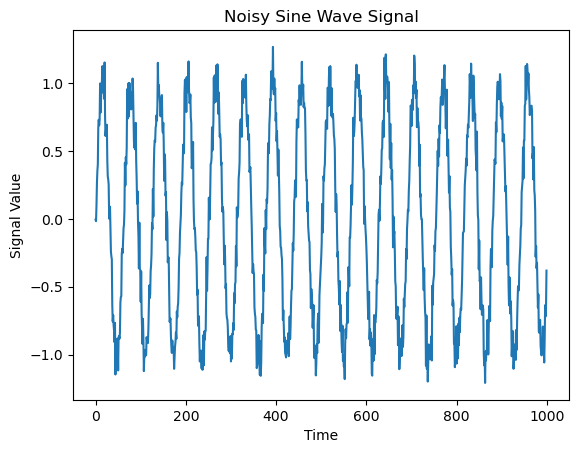

In [3]:
# Plot the time series 'y' against the time array 't'.
# The x-axis represents time, and the y-axis represents the signal.
# The plot displays the noisy sine wave signal over the time range of 0 to 1000.
plt.plot(t, y)

# Add labels to the axes for clarity
plt.xlabel('Time')
plt.ylabel('Signal Value')

# Set the title of the plot to provide context
plt.title('Noisy Sine Wave Signal')

Next, we look at the power spectrum of the function. It is defined as the squared absolute of the Fourier transform and thus gives the distribution of power in frequency space. For computing the Fourier transform, we use the in-built function `np.fft.fft()`

In [4]:
# Compute the Fast Fourier Transform (FFT) of the noisy sine wave signal 'y'.
# FFT is used to transform the signal from the time domain to the frequency domain.
fft = np.fft.fft(y)

# Compute the corresponding frequencies for each FFT component.
# 'fftfreq' generates an array of frequencies associated with the FFT result.
# The 't.shape[-1]' refers to the length of the time series (number of data points).
freq = np.fft.fftfreq(t.shape[-1])

# Compute the power spectrum by taking the square of the absolute value of the FFT components.
# This gives the power of each frequency component in the signal.
power = (np.abs(fft))**2

/var/folders/38/z0l88jxs5cxc27_d0dp0r78c0000gn/T/ipykernel_38643/3369099289.py:4: RuntimeWarning: divide by zero encountered in divide
  plt.plot(1/freq, power)


Text(0.5, 1.0, 'Power Spectrum of the Signal')

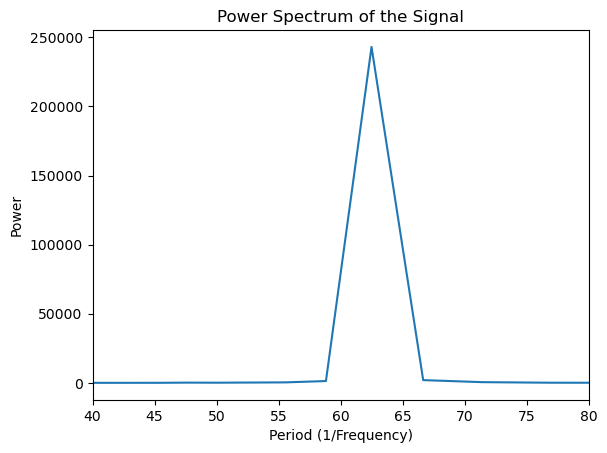

In [5]:
# Plot the power spectrum (frequency vs. power) by plotting the inverse of the frequencies against the power.
# The x-axis represents the period (1/frequency), and the y-axis represents the power at each frequency.
# Inverse of the frequency (1/freq) is used to represent the period of the signal components.
plt.plot(1/freq, power)

# Set the x-axis limits to focus on a specific frequency range (in this case, between periods 40 and 80).
# This helps zoom into a region of interest for better visualization of the power spectrum in that frequency range.
plt.xlim(40, 80)

# Add labels to the axes for clarity
plt.xlabel('Period (1/Frequency)')
plt.ylabel('Power')

# Set the title of the plot to provide context
plt.title('Power Spectrum of the Signal')

In this example, the power spectrum (Fourier transform) is sufficient because the frequency remains constant over time. However, in the following example, we will explore a case where the frequency varies with time, and the analysis will need to account for these time-dependent changes.

### 2. Time-dependent frequency

In [6]:
# Create two time arrays 't1' and 't2', representing two time segments
# 't1' spans from 0 to 500 with a step size of 1
# 't2' spans from 500 to 1000 with a step size of 1
t1 = np.arange(0, 500, 1)
t2 = np.arange(500, 1000, 1)

# Generate two noisy sine wave signals 'y1' and 'y2' for each time segment
# y1: Sine wave with a frequency factor of 1/5 (t1/5), plus Gaussian noise (mean = 0, std = 0.1)
# This represents the first part of the signal.
y1 = np.sin(t1/5) + np.random.normal(0, 0.1, 500)

# y2: Sine wave with a frequency factor of 1/15 (t2/15), plus Gaussian noise (mean = 0, std = 0.1)
# This represents the second part of the signal, with a different frequency.
y2 = np.sin(t2/15) + np.random.normal(0, 0.1, 500)

In [7]:
# Concatenate the two signals 'y1' and 'y2' into one continuous signal
y = np.concatenate((y1, y2))

Text(0.5, 1.0, 'Concatenated Noisy Sine Wave Signal')

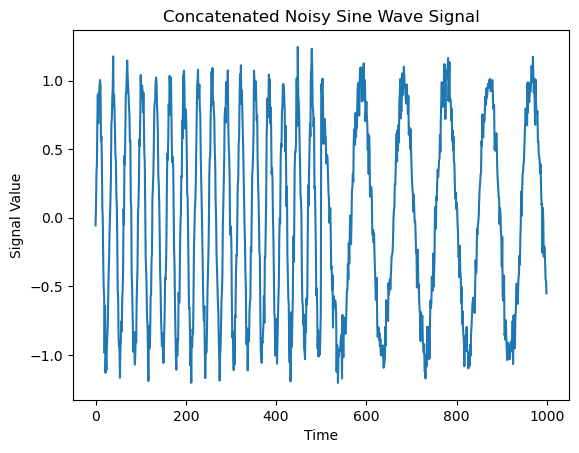

In [8]:
# Plot the concatenated signal 'y' against the time array 't'.
# The x-axis represents time, and the y-axis represents the signal values (combined from y1 and y2).
plt.plot(t, y)

# Add labels to the axes for clarity
plt.xlabel('Time')

# Set the label for the y-axis as the signal values
plt.ylabel('Signal Value')

# Set the title of the plot to provide context
plt.title('Concatenated Noisy Sine Wave Signal')

We will compare this time series to one in which both frequencies are present continuously throughout the entire time interval

In [9]:
# Create two sine wave signals 'z1' and 'z2' with different frequencies
# z1: Sine wave with a frequency factor of 1/5 (t/5), representing a low-frequency component
z1 = np.sin(t/5)

# z2: Sine wave with a frequency factor of 1/15 (t/15), representing a higher-frequency component
z2 = np.sin(t/15)

# Combine the two sine waves 'z1' and 'z2' by averaging them (adding them and dividing by 2)
# Then add Gaussian noise with mean 0 and standard deviation 0.1 to simulate real-world data
z = (z1 + z2) / 2 + np.random.normal(0, 0.1, 1000)

Text(0.5, 1.0, 'Combined Noisy Sine Wave Signal')

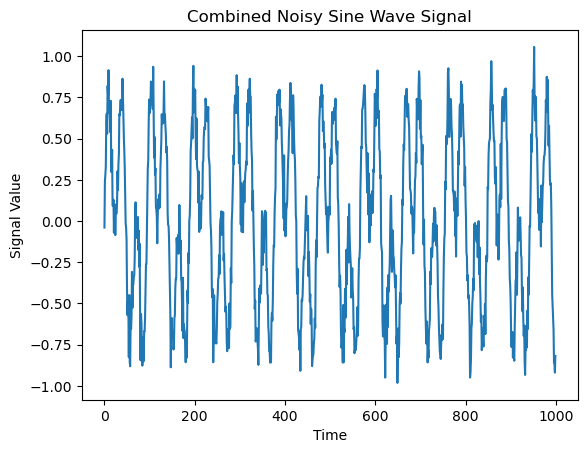

In [10]:
# Plot the combined signal 'z' against the time array 't'.
# The x-axis represents time, and the y-axis represents the values of the signal 'z',
# which is the combination of two sine waves with different frequencies, plus noise.
plt.plot(t, z)

# Add labels to the axes for clarity
plt.xlabel('Time')  # Label for the x-axis indicating time values

# Set the label for the y-axis as the signal values
plt.ylabel('Signal Value')  # Label for the y-axis indicating signal values

# Set the title of the plot to provide context
plt.title('Combined Noisy Sine Wave Signal')

Let's take a look at their power spectra.

In [11]:
# Compute the Fast Fourier Transform (FFT) of the first signal 'y'
# The FFT converts the signal 'y' from the time domain to the frequency domain, 
# allowing us to analyze the frequency components of the signal.
fft1 = np.fft.fft(y)

# Compute the FFT of the second signal 'z'
# Similarly, the FFT of 'z' provides the frequency domain representation of this signal.
fft2 = np.fft.fft(z)

# Compute the corresponding frequencies for each FFT component.
# 'fftfreq' generates an array of frequency values associated with the FFT result.
freq = np.fft.fftfreq(t.shape[-1])

# Compute the power spectrum of the first signal by squaring the absolute value of the FFT components.
# The power spectrum shows the strength of each frequency component in the signal.
power1 = (np.abs(fft1))**2

# Compute the power spectrum of the second signal 'z' in the same way.
# This gives the power for each frequency component in the signal 'z'.
power2 = (np.abs(fft2))**2

/var/folders/38/z0l88jxs5cxc27_d0dp0r78c0000gn/T/ipykernel_38643/459042106.py:4: RuntimeWarning: divide by zero encountered in divide
  plt.plot(1/freq, power1, label='Signal y')
/var/folders/38/z0l88jxs5cxc27_d0dp0r78c0000gn/T/ipykernel_38643/459042106.py:8: RuntimeWarning: divide by zero encountered in divide
  plt.plot(1/freq, power2, label='Signal z')


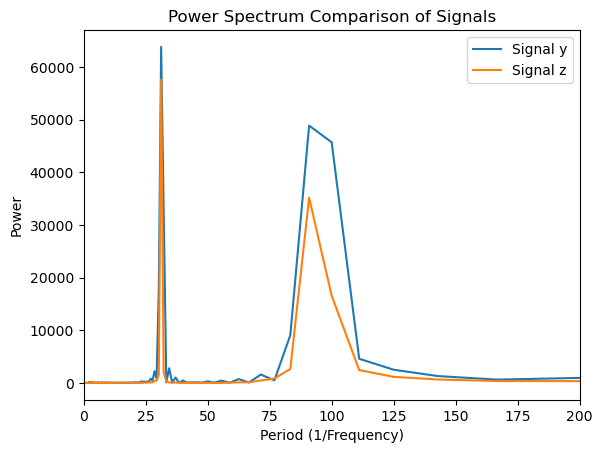

In [12]:
# Plot the power spectrum of the first signal 'y' (power1) against the period (1/frequency).
# The x-axis represents the period (inverse of frequency), and the y-axis represents the power.
# The first line shows the power spectrum of 'y'.
plt.plot(1/freq, power1, label='Signal y')

# Plot the power spectrum of the second signal 'z' (power2) against the period (1/frequency).
# The second line shows the power spectrum of 'z', also plotted against the period.
plt.plot(1/freq, power2, label='Signal z')

# Set the x-axis limits to focus on a specific frequency range (period between 0 and 200).
# This helps zoom in on the relevant range for better visualization.
plt.xlim(0, 200)

# Add labels to the axes for clarity
plt.xlabel('Period (1/Frequency)')  # Label for the x-axis indicating periods (inverse of frequency)
plt.ylabel('Power')  # Label for the y-axis indicating power of each frequency component

# Set the title of the plot to provide context
plt.title('Power Spectrum Comparison of Signals')

# Add a legend to differentiate between the two signals
plt.legend()

In this case, the power spectrum does not provide enough information to effectively distinguish between the two time series. We will now apply wavelet analysis to determine whether it offers better insight into the differences between the two signals.

## Wavelet analysis: Example

In [13]:
import pycwt as wavelet

In [14]:
# The continuous wavelet transform (CWT) function requires several parameters to be defined.
# These parameters control how the wavelet transform is computed. At this stage, you do not need to 
# fully understand each parameter, as the values provided are the default settings typically used for CWT.

# Time step, dt, set to 1 (this is the sampling interval of the signal)
dt = 1

# dj: Frequency step, defines the scale resolution. It determines the spacing between the scales used in the wavelet transform.
dj = 1/12

# s0: The smallest scale to be used in the wavelet transform. It is typically defined as a multiple of dt.
# Here, it's set to 2 times the value of dt, which is the default.
s0 = 2*dt

# mother: The wavelet mother function to be used in the transform. Here, the Morlet wavelet with a parameter of 6 is chosen.
# The Morlet wavelet is commonly used for time-frequency analysis.
mother = wavelet.Morlet(6)

# J: The number of scales in the wavelet transform. This value is the total number of scales (in this case, 7),
# divided by the frequency step dj. It determines the resolution of the wavelet transform in the scale domain.
J = 7/dj

# Compute the Continuous Wavelet Transform (CWT) for the first signal 'y'
# The CWT returns the wavelet transform (wave1), the scales used (scales1), the corresponding frequencies (freqs1),
# the cone of influence (coi1), the FFT of the signal (fft1), and the associated frequency components (fftfreqs1).
wave1, scales1, freqs1, coi1, fft1, fftfreqs1 = wavelet.cwt(y, dt, dj, s0, J, mother)

# Compute the Continuous Wavelet Transform (CWT) for the second signal 'z' in the same manner
# This returns the wavelet transform (wave2), the scales (scales2), frequencies (freqs2), cone of influence (coi2),
# FFT of the signal (fft2), and frequency components (fftfreqs2).
wave2, scales2, freqs2, coi2, fft2, fftfreqs2 = wavelet.cwt(z, dt, dj, s0, J, mother)


In [15]:
# Compute the power spectrum for the first wavelet transform 'wave1' by squaring its absolute value.
# This will give the power for each scale, representing the strength of each frequency component in the wavelet domain.
power1 = (np.abs(wave1)) ** 2

# Compute the power spectrum for the second wavelet transform 'wave2' in the same manner.
# This gives the power for each scale of the second signal, 'z'.
power2 = (np.abs(wave2)) ** 2

# Calculate the period (inverse of frequency) for the first signal using the frequencies 'freqs1' obtained from the CWT.
# The period represents the time duration of each frequency component. The higher the frequency, the shorter the period.
period1 = 1/freqs1

# Calculate the period for the second signal using the frequencies 'freqs2' obtained from the CWT.
# This represents the time duration of each frequency component in the second signal.
period2 = 1/freqs2

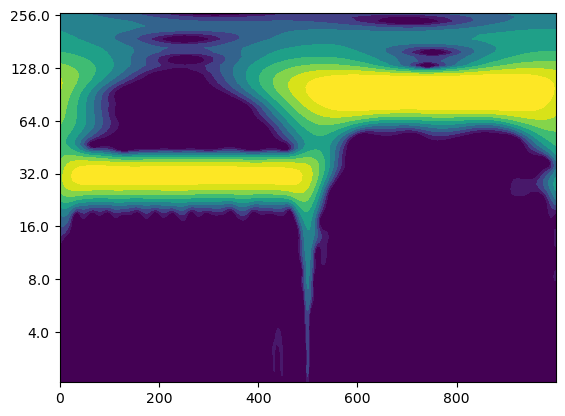

In [16]:
# Define the levels for the contour plot. These represent the logarithmic scale intervals 
# for which the contour levels will be drawn. The levels range from 0.0625 to 16.
levels = [0.0625, 0.125, 0.25, 0.5, 1, 2, 4, 8, 16]

# Create a figure and axis for the plot
fig, ax = plt.subplots()

# Generate a filled contour plot using plt.contourf()
# The x-axis corresponds to the time array 't', and the y-axis represents the logarithm of the periods ('np.log2(period1)').
# The color values are derived from the logarithm of the power spectrum 'power1', using the logarithmic levels defined above.
im = ax.contourf(t, np.log2(period1), np.log2(power1), np.log2(levels),
                  extend='both', cmap=plt.cm.viridis)

# Create the y-axis ticks for the contour plot, which represent the periods in the original scale.
# 'np.arange' generates a range of values, and 'np.ceil(np.log2(period1.min()))' ensures that the range covers the entire period span.
Yticks = 2 ** np.arange(np.ceil(np.log2(period1.min())),
                        np.ceil(np.log2(period1.max())))

# Set the y-axis ticks using the log2 of the periods and set their labels as the original period values.
ax.set_yticks(np.log2(Yticks), labels=Yticks)

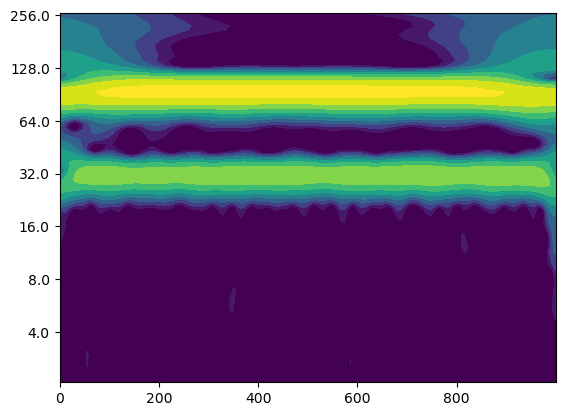

In [17]:
# Create a figure and axis for the plot
fig, ax = plt.subplots()

# Generate a filled contour plot using plt.contourf()
# The x-axis corresponds to the time array 't', and the y-axis represents the logarithm of the periods ('np.log2(period2)').
# The color values are derived from the logarithmic of the power spectrum 'power2', using the logarithmic levels defined above.
im = ax.contourf(t, np.log2(period2), np.log2(power2), np.log2(levels),
                  extend='both', cmap=plt.cm.viridis)

# Create the y-axis ticks for the contour plot, which represent the periods in the original scale.
# 'np.arange' generates a range of values, and 'np.ceil(np.log2(period2.min()))' ensures that the range covers the entire period span.
Yticks = 2 ** np.arange(np.ceil(np.log2(period2.min())),
                        np.ceil(np.log2(period2.max())))

# Set the y-axis ticks to the logarithmic scale (for proper placement), 
# and set their labels to the original period values.
ax.set_yticks(np.log2(Yticks), labels=Yticks)

### <font color=blue>**Question**: </font>What do you observe?

## What is the theory behind wavelet analysis?

The foundation of a wavelet transform lies in the concept of the **mother wavelet**, which is the base function used to generate the wavelets at different scales. There are various types of mother wavelets, each with its own properties and applications. 

In this course, we use the **Morlet wavelet**, which is defined as:

$$
\psi(t) = \pi^{1/4} \exp(i\omega t) \exp\left(-\frac{t^2}{2}\right)
$$

where $( \omega = 6 )$ is the frequency parameter that controls the width of the wavelet.


Let's see how the real and imaginary part of that function look like.

In [18]:
def morlet_wavelet(t, omega=6):
    return (np.pi**(1/4) * np.exp(1j*omega*t) * np.exp(-t**2/2))

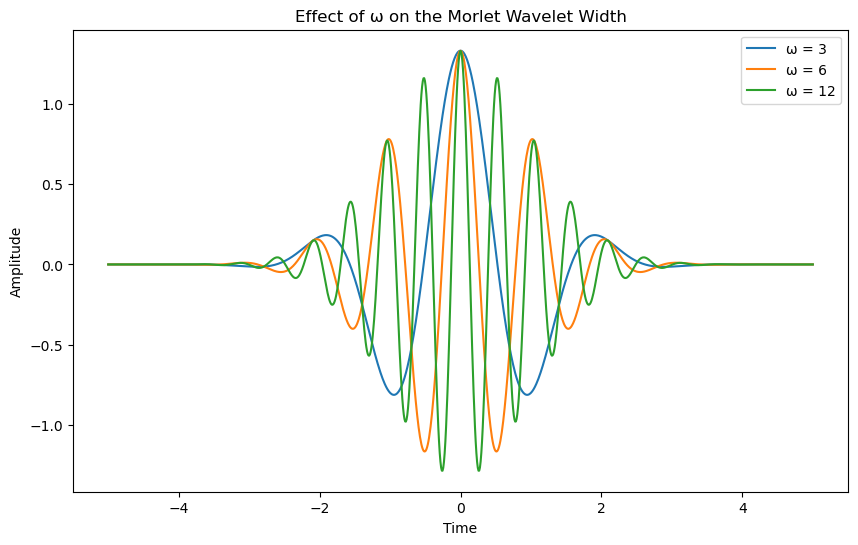

In [19]:
# Define time array
t = np.linspace(-5, 5, 1000)

# Define different omega values to see how the width of the Morlet wavelet changes
omegas = [3, 6, 12]

# Create a plot to visualize how the width of the wavelet changes with omega
plt.figure(figsize=(10, 6))

for omega in omegas:
    # Compute the wavelet for each omega
    wavelet = morlet_wavelet(t, omega)
    
    # Plot the real part of the Morlet wavelet
    plt.plot(t, np.real(wavelet), label=f'ω = {omega}')

# Add labels and title
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Effect of ω on the Morlet Wavelet Width')
plt.legend()

Text(0.5, 1.0, 'Morlet Wavelet: Real and Imaginary Parts')

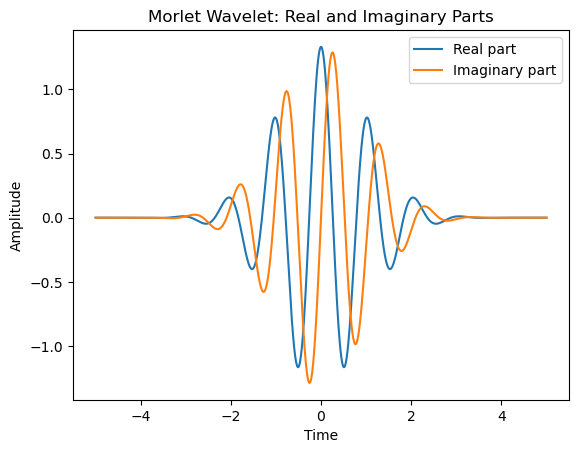

In [20]:
psi = morlet_wavelet(t)

# Plot the real and imaginary parts of the Morlet wavelet
plt.plot(t, np.real(psi), label="Real part")
plt.plot(t, np.imag(psi), label="Imaginary part")

# Add a legend to differentiate the parts
plt.legend()

# Add axis labels and title
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Morlet Wavelet: Real and Imaginary Parts')

The **Continuous Wavelet Transform (CWT)** of a time series $ x_t $ is a convolution of the time series with a set of scaled and shifted versions of a "mother wavelet," referred to as **wavelet daughters**. 

Each daughter wavelet is obtained by shifting the mother wavelet in time by $ \tau $ and scaling it by $ s $, where $ \tau $ controls the translation (shift, likely in time) and $ s $ controls the dilation (scaling) of the mother wavelet.

The mathematical expression for the CWT at a specific time $ \tau $ and scale $ s $ is:

$$
CWT(\tau, s) = \sum_t x_t \frac{1}{\sqrt{s}} \psi^*\left( \frac{t - \tau}{s} \right)
$$

where:
- $ \psi^*(\cdot) $ denotes the complex conjugate of the wavelet function,
- $ x_t $ is the time series being analyzed, and
- $ t $ represents the time index.

## What do varying $ \tau $ and $ s $ mean?

- **Varying $ \tau $**: The parameter $ \tau $ controls the **translation** of the wavelet along the time axis. Changing $ \tau $ shifts the wavelet in time, allowing the CWT to capture temporal features of the time series at different time instances.

- **Varying $ s $**: The parameter $ s $ controls the **scaling** (or dilation) of the wavelet. When $ s $ is small, the wavelet is compressed (higher frequency), and when $ s $ is large, the wavelet is stretched (lower frequency). Varying $ s $ allows the CWT to analyze the time series at different frequency scales, capturing both high-frequency and low-frequency components depending on the scale.

The CWT, therefore, provides a time-frequency representation of the signal, where varying $ \tau $ gives information about the time location of features, and varying $ s $ gives information about the frequency content at that specific time.


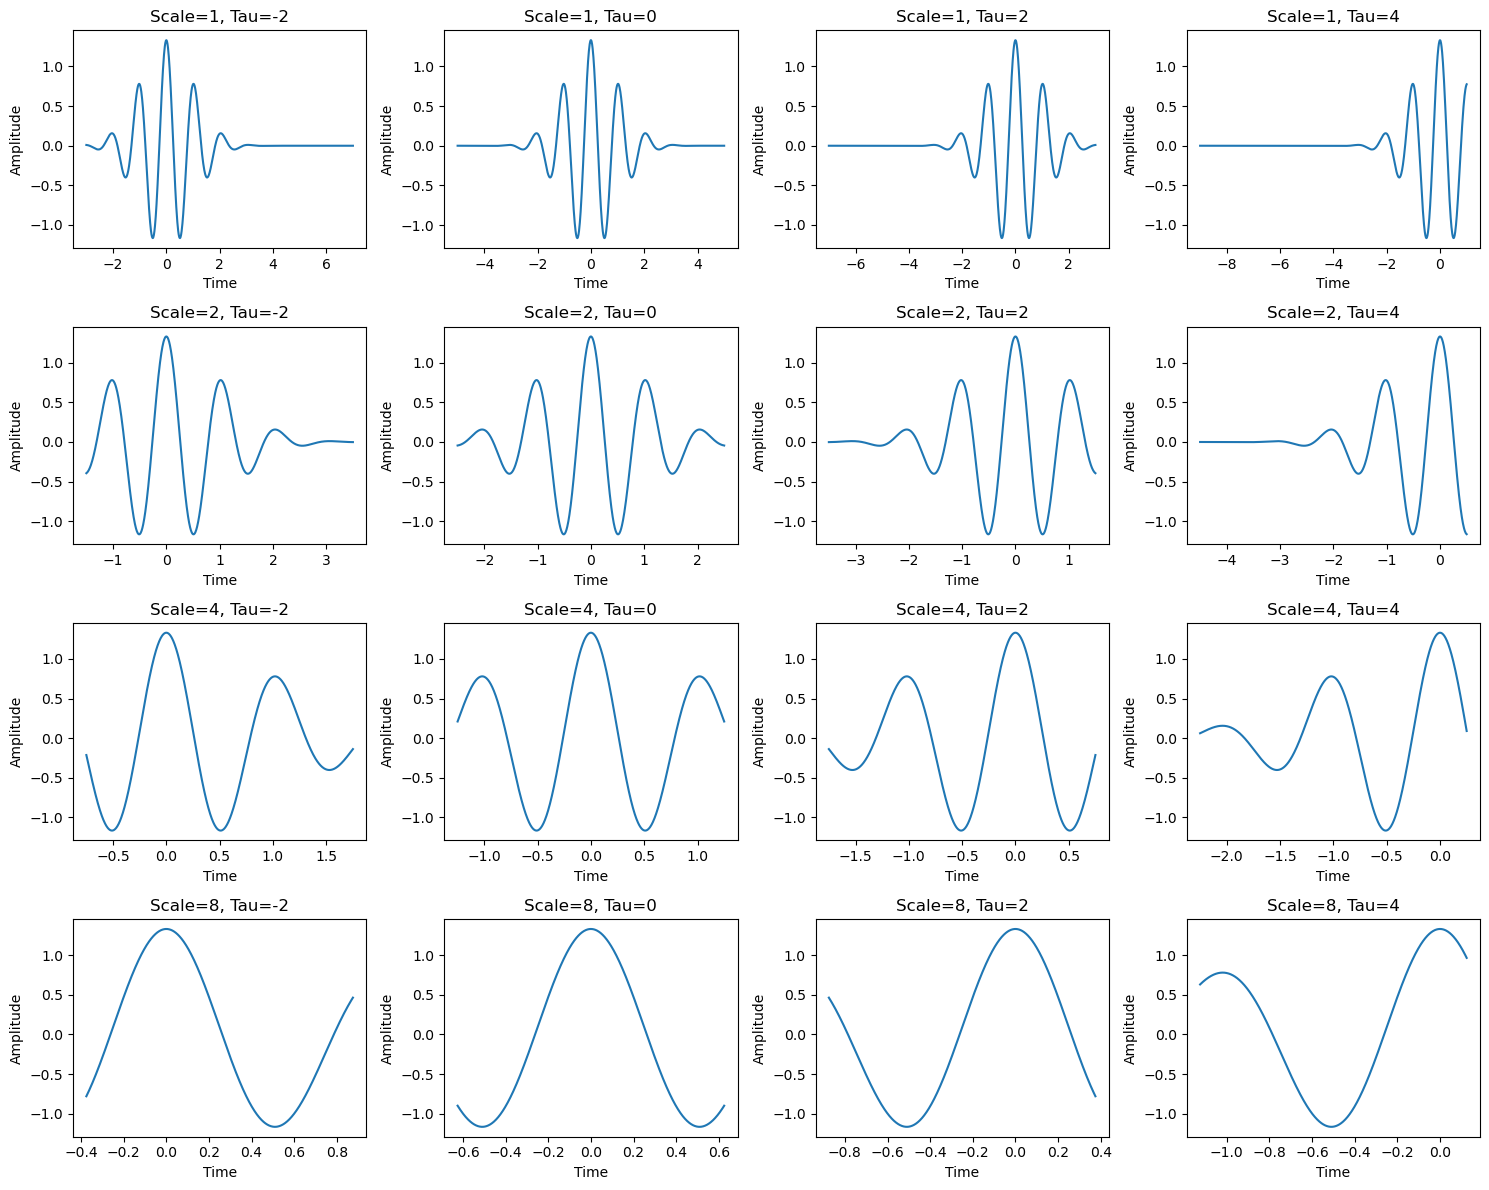

In [21]:
# Create figure and axes for 4x4 subplots
fig, axes = plt.subplots(4, 4, figsize=(15, 12))

# Different scales (s) and time shifts (tau) for the wavelet transform
scales = [1, 2, 4, 8]
taus = [-2, 0, 2, 4]

# Plot wavelets for different scales and shifts
for i, scale in enumerate(scales):
    for j, tau in enumerate(taus):
        # Compute the wavelet with current scale and shift (tau)
        t = np.linspace(-5, 5, 1000)
        t = (t - tau) / scale
        wavelet = morlet_wavelet(t, omega=6)
        
        # Plot the real part of the shifted and scaled wavelet in the corresponding subplot
        ax = axes[i, j]
        ax.plot(t, np.real(wavelet))
        ax.set_title(f'Scale={scale}, Tau={tau}')
        ax.set_xlabel('Time')
        ax.set_ylabel('Amplitude')

# Adjust the layout and display the plot
plt.tight_layout()

### Computing the Continuous Wavelet Transform (CWT)

To compute the **Continuous Wavelet Transform (CWT)** for a time series, we need to loop over all scales for each time step. This can be computationally expensive, especially for long signals. However, there is a more efficient approach using the **Discrete Fourier Transform (FFT)**. By leveraging the convolution theorem, we can compute the CWT for all time steps simultaneously.

#### The Convolution Theorem

The convolution theorem states that the convolution of two functions, $ g(t) $ and $ h(t) $, in the time domain is equivalent to the inverse Fourier transform of the product of their Fourier transforms. Mathematically, this can be expressed as:

$$
(g * h)(\tau) = \mathcal{F}^{-1}\left( \hat{g}(\omega) \cdot \hat{h}(\omega) \right)
$$

where:
- $ g(t) $ and $ h(t) $ are the functions being convolved,
- $ \hat{g}(\omega) $ and $ \hat{h}(\omega) $ are the Fourier transforms of $ g(t) $ and $ h(t) $, respectively,
- $ \mathcal{F}^{-1} $ denotes the inverse Fourier transform, and
- $ \tau $ represents the time shift parameter.

This theorem allows us to compute the CWT efficiently by applying the Fourier transform to both the signal and the wavelet, multiplying them pointwise in the frequency domain, and then applying the inverse Fourier transform to obtain the result in the time domain.

#### Why Use FFT for CWT?

The key advantage of using FFT for CWT is that it converts the convolution operation into a multiplication operation in the frequency domain, which is computationally much faster. By using FFT, we can compute the CWT for all time steps at once, making the process significantly more efficient than directly computing the convolution for each time step individually.

This method is particularly useful for real-time signal processing and in situations where multiple scales need to be computed across large datasets.


$$
CWT(\tau, s) = \int x(t) \frac{1}{\sqrt{s}} \psi^*\left(\frac{t - \tau}{s}\right) dt
$$

Where:
- $ x(t) $ is the signal,
- $ \psi^*(t) $ is the complex conjugate of the wavelet,
- $ \tau $ is the time shift,
- $ s $ is the scale (frequency),
- The factor $ \frac{1}{\sqrt{s}} $ ensures proper normalization of the wavelet.

When we apply this to our wavelet transform, we get:

$$
CWT(\tau, s) = \mathcal{F}^{-1} \left( \hat{x}(\omega) \cdot \hat{\psi}^*(s \omega) \right)
$$

Where:
- $ \hat{x}(\omega) $ and $ \hat{\psi}(\omega) $ are the Fourier transforms of the signal $ x(t) $ and the wavelet $ \psi(t) $, respectively,
- $ \mathcal{F}^{-1} $ denotes the inverse Fourier transform,
- $ s $ is the scale factor, and 
- $ \hat{\psi}^*(s \omega) $ represents the scaled and conjugated Fourier transform of the wavelet.


### Discrete Frequencies

The frequency components $ \omega_k $ are given by the discrete Fourier transform and are defined as:

$$
\omega_k = \pm \frac{2\pi k}{T}
$$

Where:
- $ \omega_k $ is the angular frequency corresponding to the frequency index $ k $,
- $ T $ is the length of the signal, and
- $ k $ is the discrete frequency index.

Thus, the CWT can be expressed as:

$$
CWT(\tau, s) = \sum_k \hat{x}_k \hat{\psi}^*(s \omega_k) \exp(i \omega_k \tau)
$$

Where:
- $ \hat{x}_k $ and $ \hat{\psi}(\omega_k) $ are the Fourier coefficients of the signal and wavelet,
- $ \omega_k $ are the discrete frequencies corresponding to the Fourier transform.

This formulation allows us to compute the CWT efficiently using the Fourier transform and the inverse Fourier transform.


Let's apply this to a simple example (the function z we defined above) and try to re-build the wavelet transform of z.

In [22]:
# Create a time array 't' from 0 to 999 with a step size of 1 (1000 data points)
# This represents the time domain over which we generate the signals.
t = np.arange(0, 1000, 1)

# Generate the first signal 'z1' as a sine wave with a period of 5 units.
# This means that the sine wave completes one full cycle every 5 time steps.
z1 = np.sin(t/5)

# Generate the second signal 'z2' as a sine wave with a period of 15 units.
# This sine wave oscillates slower, completing one full cycle every 15 time steps.
z2 = np.sin(t/15)

# Combine 'z1' and 'z2' by averaging them (add them together and divide by 2)
# This creates a signal that is the result of both sine waves. 
# Additionally, add random noise to the combined signal to simulate real-world data.
# The noise is g
z = (z1 + z2) #+ np.random.normal(0, 0.01, 1000)


In [23]:
def morlet_wavelet(t):
    return (np.pi**(1/4) * np.exp(6j*t) * np.exp(-t**2/2))

def morlet_fft(w):
    return (np.pi**(-1/4) * np.exp(-1/2 * (w-6)**2))

We start by computing the Fourier transform of our signal:

In [24]:
f = np.fft.fft(z)

Now we need to define the timestep $dt$ by which we vary $\tau$, the minimum scale $s_0$ to be considered and variation $dj$ of the scales:

In [25]:
dt = 1
s0 = 2*dt
dj = 1/24

We also need the length of the time series: 

In [26]:
n = len(z)

Next, we determine the frequencies $\omega_k$ of the fourier transform $f$:

In [27]:
# Generate an array of frequencies using np.linspace
# 'freq' represents the frequency array that corresponds to a discrete set of frequencies.
# The linspace function is used to generate 1000 points between 0 and the Nyquist frequency.

# Explanation of the parameters:
# - np.linspace(0, (len(f) - 1)/len(f) * 2 * np.pi, 1000)
#    - The start of the interval is 0, which corresponds to the lowest frequency.
#    - The end of the interval is determined by the length of the signal 'f'. It is calculated
#      as (len(f) - 1) / len(f) * 2 * np.pi to ensure the maximum frequency corresponds to the Nyquist frequency.
#    - The 1000 argument specifies the number of points (frequencies) to generate between 0 and the maximum frequency.
#    - The result is stored in 'freq', which is an array of evenly spaced frequency values from 0 to the Nyquist frequency.

ftfreqs = 2 * np.pi * np.fft.fftfreq(n, dt)

Now we determine the scales $s$:

In [28]:
# Calculate the number of scales (J1) for the wavelet transform
# This formula determines how many scales to use in the wavelet analysis.
# The scale resolution (dj) and the length of the signal, n, are used to compute the number of scales.
# The formula is derived from the desired scale range and the frequency resolution.

J1 = np.round(np.log2(n * dt / s0) / dj)

# Explanation of parameters:
# - n: The length of the time series (number of data points).
# - dt: The time step, or sampling interval, between the data points.
# - s0: The smallest scale used for the wavelet transform, typically referred to as the initial scale.
#       It defines the smallest feature that the wavelet can detect.
# - dj: The scale resolution, also known as the logarithmic spacing between successive scales.
#       It defines the relative spacing between the scales, affecting how finely we sample the frequency range.

# The formula calculates J1, which is the number of scales (or frequency bins) based on the length of the signal (n),
# the time step (dt), and the initial scale (s0). The scaling factor dj controls how much resolution we have between the scales.
# The use of np.round() ensures that J1 is rounded to the nearest integer value.

# Next, we generate the actual scale values to be used in the wavelet transform.

scale = s0 * 2 ** (np.arange(0, J1 + 1) * dj)

# Explanation of scale array generation:
# - s0: The initial scale, which defines the smallest scale in the array.
# - s0 * 2**(J1 * dj): The final scale in the array, determined by the number of scales (J1) and the scale resolution (dj).
# - s0 * 2**dj: The step size, or the amount by which the scale increases at each step. It is determined by the resolution dj.


Finally, we can compute the wavelet:

In [29]:
# Create a zero matrix to store the wavelet transform coefficients
# This matrix will hold the CWT results for each scale and time point.

wave = np.zeros((int(J1) + 1, n), dtype = 'F')

In [49]:
# Loop over each scale (from 0 to J1), where J1 is the number of scales in the wavelet transform.
for a in np.arange(0, int(J1) + 1, 1):
    
    # Compute the conjugate of the Fourier transform of the wavelet at the current scale.
    # The wavelet at the current scale is scaled by 'scale[a]' and the frequency array 'freq'.
    psi_ft = morlet_fft(scale[a] * ftfreqs)
    
    # Apply the scaling factor 1/(scale[a] * n)**0.5 to the conjugate of the Fourier-transformed wavelet.
    # This scaling adjusts the wavelet's amplitude in the frequency domain.
    psi_ft_bar = (2*np.pi*scale[a]/dt)**.5 * np.conjugate(psi_ft)
    
    # Compute the inverse Fourier transform (ifft) of the product of the signal 'f' and the adjusted wavelet.
    # This operation corresponds to the convolution of the signal with the wavelet in the time domain.
    cwt = np.fft.ifft(f * psi_ft_bar)
    
    # Store the real and imaginary parts of the inverse Fourier transform result 'cwt' in the 'wave' array.
    # The result is stored for each scale 'a' and each time step 'i'.
    # for i in np.arange(0, n, 1):
    wave[a, :] =  cwt

In [50]:
1/scale[a]

0.001005177965472161

Let's take a look at the power spectrum of our wavelet:

In [51]:
power = np.abs(wave)**2

(0.0, 20.0)

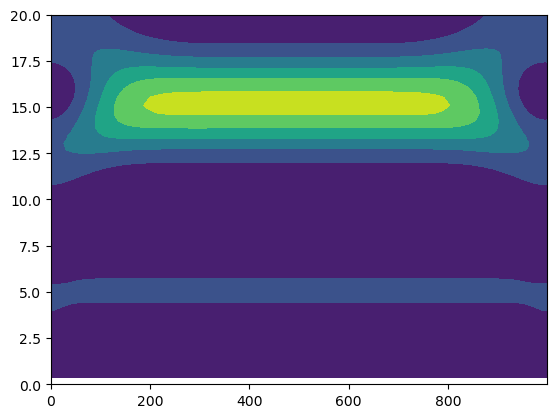

In [52]:
plt.contourf(np.arange(0,len(z)), scale[1:int(J1)+1]/6, (power[1:]))
plt.ylim([0, 20])

### <font color=red>**Exercise**: </font> Define a simple periodic function (e. g. a superposition of 3 different sine waves) and compute its wavelet by using the wavelet.cwt() function.

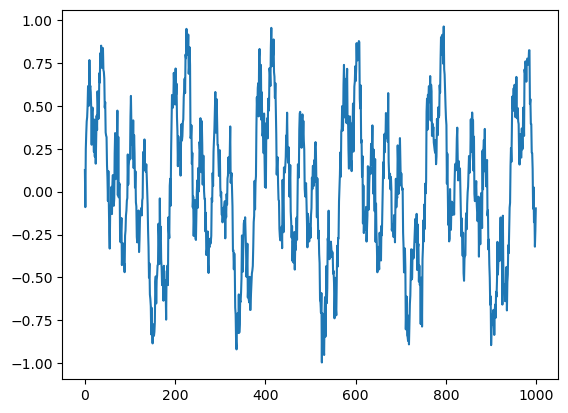

In [208]:
wave1, scales1, freqs1, coi1, fft1, fftfreqs1 = wavelet.cwt(z, dt, dj, s0, J, mother)
period = 1 / freqs1

AttributeError: 'numpy.ndarray' object has no attribute 'cwt'

In [36]:
power = (np.abs(wave1))**2

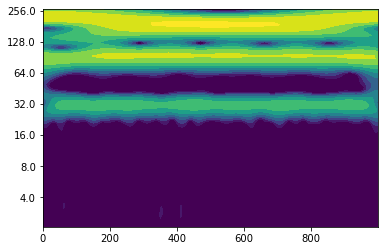

In [38]:
fig, ax = plt.subplots()
im = plt.contourf(t, np.log2(period), np.log2(power), np.log2(levels),
            extend='both', cmap=plt.cm.viridis)
Yticks = 2 ** np.arange(np.ceil(np.log2(period.min())),
                           np.ceil(np.log2(period.max())))
plt.yticks(np.log2(Yticks), labels = Yticks);

# Wavelet analysis of saltwater inflows to the Baltic Sea

In the lecture you have already learned something about the properties of saltwater inflows from the North Sea into the Baltic Sea. We now want to perform wavelet analysis on these inflows to check whether there is any periodicity. As raw data we use the major baltic inflow (MBI) time series prepared by Volker Mohrholz ranging from 1887 to 2021. Make sure you have the file "salt_import_DS5_ann_norm.txt" in your folder. It lists the annual salt import from MBIs in Gt. Possible linear trends have been removed and the salt import has been normalized by dividing it by its standard deviation (that is common data preprocessing for wavelet analysis). If you are not in your own working directory, type ```import os``` and ```os.chdir("/students_files/your_surname/")``` to get in your directory before you read in the data.

### <font color=red>**Exercise**: </font>Read in the file using the function np.loadtxt() and call the resulting numpy array "saltimport". Define a numpy array "years" ranging from 1887 to 2022 and plot the salt import.

In [39]:
saltimport = np.loadtxt("salt_import_DS5_ann_norm.txt")

In [40]:
years = np.arange(1887, 2022, 1)

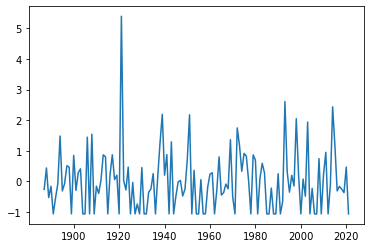

In [41]:
#plot saltimport versus years
plt.plot(years, saltimport)

For a first check on whether the time series exhibits any kind of low frequency variability, we can calculate a running mean, e. g. 11-year running mean:

In [42]:
def moving_average(x, w):
    return np.convolve(x, np.ones(w), 'valid') / w

In [43]:
saltimport_11 = moving_average(saltimport, 11)

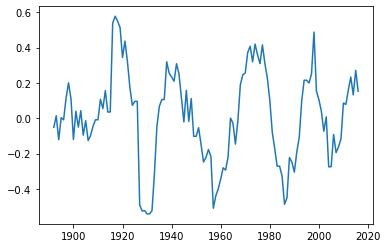

In [44]:
plt.plot(years[5:-5], saltimport_11)

This looks indeed as if there is some variability on a time scale of 20 to 30 years at least since about 1920. Wavelet analysis will hopefully tell us more.

### <font color=red>**Exercise**: </font>Now calculate the wavelet (with wavelet.cwt() as before) and plot its power.

In [45]:
#calculate wavelet
wave, scales, freqs, coi, fft, fftfreqs = wavelet.cwt(saltimport, dt, dj, s0, J, mother)
period=1/freqs
power = (np.abs(wave))**2

In [46]:
levels = [0.25, 0.5, 1, 2, 4, 8, 16]

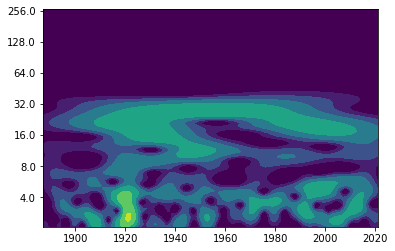

In [47]:
#plot wavelet power spectrum
fig, ax = plt.subplots()
im = plt.contourf(years, np.log2(period), np.log2(power), np.log2(levels),
            extend='both', cmap=plt.cm.viridis)
Yticks = 2 ** np.arange(np.ceil(np.log2(period.min())),
                           np.ceil(np.log2(period.max())))
plt.yticks(np.log2(Yticks), labels = Yticks);

### <font color=blue>**Question**: </font>How would you interpret this figure?

## Cone of influence

The edges of the spectrum are difficult to interpret since our time series is finite (but the Fourier transform requires an infinitely periodic function). In order to see in which regions edge effects play a role, we can define a so-called "cone of influence". Let's plot the last figure again including the cone of influence:

(1.0, 7.0)

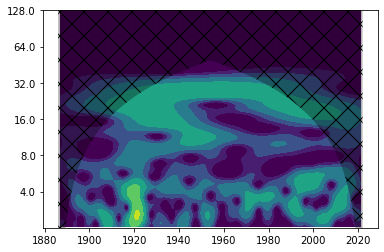

In [48]:
fig, ax = plt.subplots()
im = plt.contourf(years, np.log2(period), np.log2(power), np.log2(levels),
            extend='both', cmap=plt.cm.viridis)
plt.fill(np.concatenate([years, years[-1:] + dt, years[-1:] + dt,
                           years[:1] - dt, years[:1] - dt]),
        np.concatenate([np.log2(coi), [1e-9], np.log2(period[-1:]),
                           np.log2(period[-1:]), [1e-9]]),
        'k', alpha=0.3, hatch='x')
Yticks = 2 ** np.arange(np.ceil(np.log2(period.min())),
                           np.ceil(np.log2(period.max())))
plt.yticks(np.log2(Yticks), labels = Yticks)
plt.ylim(1, 7)

This shows that especially wavelet power at very low frequencies has to be interpreted carefully.

## Global power spectrum

If you average the wavelet power spectrum along the time axis, you get the so-called "global power spectrum". Not very surprisingly (since both of them live in frequency space), it is comparable to the Fourier spectrum (more precisely a smoothed version of it) as you can see below.

In [49]:
global_power = power.mean(axis=1)

In [50]:
fft_power = (np.abs(fft)) ** 2

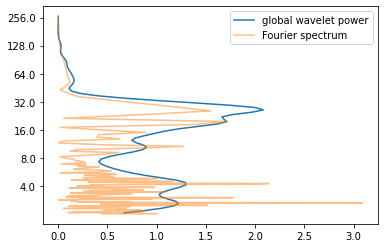

In [51]:
plt.plot(global_power, np.log2(period), label = "global wavelet power")
plt.plot(fft_power, np.log2(1/fftfreqs), alpha = 0.5, label = "Fourier spectrum")
plt.yticks(np.log2(Yticks), labels = Yticks)
plt.legend()

## Noise

Let's find out how the wavelet power spectrum of noise looks like.

In [52]:
noise = np.random.normal(0, 0.1, 1000)

In [53]:
wave, scales, freqs, coi, fft, fftfreqs = wavelet.cwt(noise, dt, dj, s0, J, mother)

In [54]:
power = (np.abs(wave)) ** 2

In [55]:
period = 1/freqs

In [56]:
levels = [0.015625, 0.03125, 0.0625, 0.125, 0.25, 0.5, 1]

([<matplotlib.axis.YTick at 0x7f8fd1b94c50>,
 [Text(0, 2.0, '4.0'),
  Text(0, 3.0, '8.0'),
  Text(0, 4.0, '16.0'),
  Text(0, 5.0, '32.0'),
  Text(0, 6.0, '64.0'),
  Text(0, 7.0, '128.0'),
  Text(0, 8.0, '256.0')])

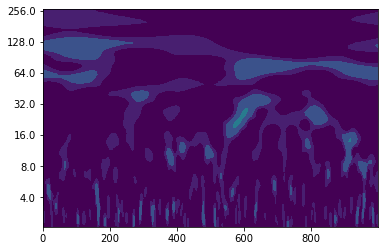

In [57]:
fig, ax = plt.subplots()
im = plt.contourf(t, np.log2(period), np.log2(power), np.log2(levels),
            extend='both', cmap=plt.cm.viridis)
Yticks = 2 ** np.arange(np.ceil(np.log2(period.min())),
                           np.ceil(np.log2(period.max())))
plt.yticks(np.log2(Yticks), labels = Yticks)

You see that there is another challenge when it comes to interpreting wavelet power spectra - you have to distinguish what is "real" periodicity and what is just caused by noise.

# Wavelet coherence (advanced)

Let's get back to our salt import time series. We might wonder what causes the periodicities in the time series. As you maybe remember from the lectures, the river runoff to the Baltic Sea has an impact on the saltwater inflows. Let's find out how the wavelet power spectrum of annual mean river runoff looks like.

In [58]:
runoff = np.loadtxt("runoff_ann_norm.txt")

In [59]:
years2 = np.arange(1850, 2009, 1)

In [60]:
wave, scales, freqs, coi, fft, fftfreqs = wavelet.cwt(runoff, dt, dj, s0, J, mother)

In [61]:
power = (np.abs(wave)) ** 2

In [62]:
period = 1/freqs

In [63]:
levels = [0.25, 0.5, 1, 2, 4, 8, 16]

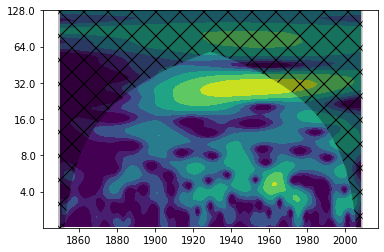

In [64]:
fig, ax = plt.subplots()
im = plt.contourf(years2, np.log2(period), np.log2(power), np.log2(levels),
            extend='both', cmap=plt.cm.viridis)
Yticks = 2 ** np.arange(np.ceil(np.log2(period.min())),
                           np.ceil(np.log2(period.max())))
plt.yticks(np.log2(Yticks), labels = Yticks)
plt.ylim(1, 7)
plt.fill(np.concatenate([years2, years2[-1:] + dt, years2[-1:] + dt,
                           years2[:1] - dt, years2[:1] - dt]),
        np.concatenate([np.log2(coi), [1e-9], np.log2(period[-1:]),
                           np.log2(period[-1:]), [1e-9]]),
        'k', alpha=0.3, hatch='x')

Indeed, the wavelet power spectrum shows power between 16 and 32 years. In order to really find out whether the salt import and the river runoff vary on comparable time scales, we can compute the so-called "wavelet coherence" (or cross-correlation). Note: The time ranges of the two time series are different.

In [65]:
years3 = np.arange(1887, 2009, 1)

In [66]:
WCT, aWCT, corr_coi, freq, sig = wavelet.wct(runoff[37:], saltimport[:122], dt, dj, s0=-1, J=-1,
                                             significance_level=0.8646,
                                             wavelet='morlet', normalize=True,
                                             cache=True)

NOTE: WCT significance loaded from cache.



/students_files/.local/lib/python3.7/site-packages/pycwt/wavelet.py:562: RuntimeWarning: invalid value encountered in arctanh
  aa = np.round(np.arctanh(np.array([al1, al2]) * 4))


In [67]:
cor_period = 1 / freq

In [68]:
extent_corr = [years3.min(), years3.max(), 0, max(cor_period)]

In [69]:
from matplotlib.image import NonUniformImage

([<matplotlib.axis.YTick at 0x7f8fd0046650>,
 [Text(0, 1.0, '2.0'),
  Text(0, 2.0, '4.0'),
  Text(0, 3.0, '8.0'),
  Text(0, 4.0, '16.0'),
  Text(0, 5.0, '32.0'),
  Text(0, 6.0, '64.0')])

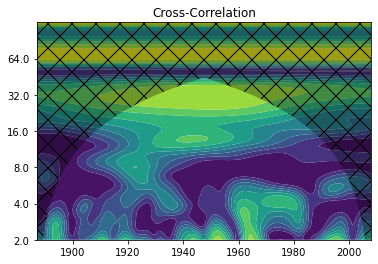

In [74]:
fig, ax = plt.subplots()
im = NonUniformImage(ax, interpolation='bilinear', extent=extent_corr)
im.set_data(years3, cor_period, WCT)
levels = np.linspace(0, 1, 11)

im = ax.contourf(years3, np.log2(cor_period), WCT, levels,
            extent=extent_corr, cmap=plt.cm.viridis, antialiased = True)
ax.fill(np.concatenate([years3, years3[-1:]+dt, years3[-1:]+dt, years3[:1]-dt, years3[:1]-dt]),
         np.concatenate([np.log2(corr_coi), [1e-9], np.log2(cor_period[-1:]), np.log2(cor_period[-1:]),
                         [1e-9]]), 'k', alpha=0.3, hatch='x')
ax.set_title('Cross-Correlation')
ax.set_ylim(1, 7)
Yticks = 2 ** np.arange(np.ceil(np.log2(cor_period.min())),
                           np.ceil(np.log2(cor_period.max())))
ax.set_xlim(years3.min(), years3.max())
plt.yticks(np.log2(Yticks), labels = Yticks)


This shows us, at what times and in which frequency ranges the two time series are correlated. However, we do not know whether their wavelets actually have noticable power there. To find that out, we can also determine the so-called "common wavelet power".


In [75]:
W12, cross_coi, freq, signif = wavelet.xwt(runoff[37:], saltimport[:122], dt, dj=1/12, s0=-1, J=-1,
                                           significance_level=0.8646,
                                           wavelet='morlet', normalize=True)

In [76]:
cross_power = np.abs(W12)**2
cross_period = 1/freq

In [77]:
extent_cross = [years3.min(), years3.max(), 0, max(cross_period)]

([<matplotlib.axis.YTick at 0x7f8fd1af7390>,
 [Text(0, 1.0, '2.0'),
  Text(0, 2.0, '4.0'),
  Text(0, 3.0, '8.0'),
  Text(0, 4.0, '16.0'),
  Text(0, 5.0, '32.0'),
  Text(0, 6.0, '64.0')])

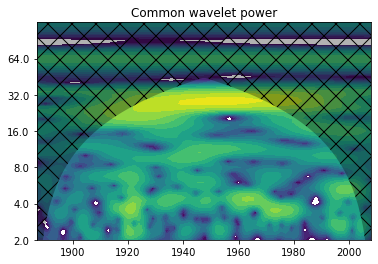

In [78]:
fig, ax = plt.subplots()
im = NonUniformImage(ax, interpolation='bilinear', extent=extent_cross)
im.set_data(years3, cross_period, cross_power)
levels = [0.015625/8., 0.015625/4., 0.015625/2., 0.015625, 0.03125, 0.0625, 0.125, 0.25, 0.5, 1, 2, 4, 8, 16, 32, 64]

im = ax.contourf(years3, np.log2(cross_period), np.log2(cross_power), np.log2(levels),
            extent=extent_cross, cmap=plt.cm.viridis)
ax.fill(np.concatenate([years3, years3[-1:]+dt, years3[-1:]+dt, years3[:1]-dt, years3[:1]-dt]),
         np.concatenate([np.log2(cross_coi), [1e-9], np.log2(cross_period[-1:]), np.log2(cross_period[-1:]),
                         [1e-9]]), 'k', alpha=0.3, hatch='x')
ax.set_title('Common wavelet power')
ax.set_ylim(1, 7)
Yticks = 2 ** np.arange(np.ceil(np.log2(cross_period.min())),
                           np.ceil(np.log2(cross_period.max())))
ax.set_xlim(years3.min(), years3.max())
plt.yticks(np.log2(Yticks), labels = Yticks)

### <font color=blue>**Question**</font>: How would you interpret this graph? And what does it tell us about the cross-correlation?

# Significance (advanced)

So far, we have looked at many different wavelet power spectra but we never cared about whether the power we see at a certain time and period is significant. And what does significance actually mean in this context? For this, let's get back to our salt import time series and re-plot the (global) wavelet power spectrum including significance levels.

In [79]:
wave, scales, freqs, coi, fft, fftfreqs = wavelet.cwt(saltimport, dt, dj, s0, J, mother)

In [80]:
power = (np.abs(wave)) ** 2

In [81]:
period = 1/freqs

In [82]:
alpha, _, _ = wavelet.ar1(saltimport)

In [83]:
signif, fft_theor = wavelet.significance(1.0, dt, scales, 0, alpha,
                                         significance_level=0.95,
                                         wavelet=mother)
sig95 = np.ones([1, len(years)]) * signif[:, None]
sig95 = power / sig95

In [84]:
global_power = power.mean(axis=1)
dof = len(years) - scales
global_signif, tmp = wavelet.significance(1.0, dt, scales, 1, alpha,
                                        significance_level=0.95, dof=dof,
                                        wavelet=mother)

([<matplotlib.axis.YTick at 0x7f8fcbf94190>,
 [Text(0, 1.0, '2.0'),
  Text(0, 2.0, '4.0'),
  Text(0, 3.0, '8.0'),
  Text(0, 4.0, '16.0'),
  Text(0, 5.0, '32.0'),
  Text(0, 6.0, '64.0')])

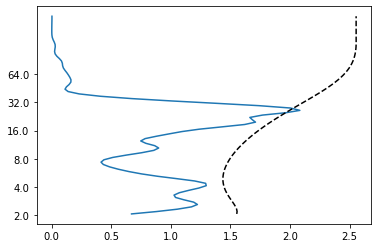

In [85]:
plt.plot(global_power, np.log2(period))
plt.plot(global_signif, np.log2(period), 'k--')
plt.yticks(np.log2(Yticks), labels = Yticks)

So what have we done here? The black dashed line shows where the global power spectrum gets significant. So apparently, there is only very little significant wavelet power at about 30 years. The black line displays the global wavelet power of a red-noise process (as you learned in the lecture, many time series in climate and ocean science can be modelled by red-noise precesses). We can now also find out where the wavelet power spectrum is significant compared to that of a red-noise process.

In [86]:
levels = [0.25, 0.5, 1, 2, 4, 8, 16]

(1.0, 7.0)

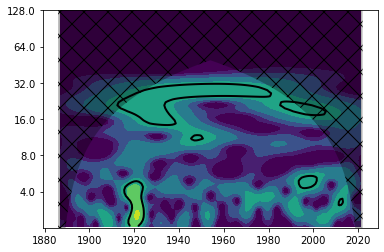

In [87]:
fig, ax = plt.subplots()
im = plt.contourf(years, np.log2(period), np.log2(power), np.log2(levels),
            extend='both', cmap=plt.cm.viridis)
extend = [years.min(), years.max(), 0, max(period)]
plt.contour(years, np.log2(period), sig95, [-99, 1], colors='k', linewidths=2, extend=extend)
plt.fill(np.concatenate([years, years[-1:] + dt, years[-1:] + dt,
                           years[:1] - dt, years[:1] - dt]),
        np.concatenate([np.log2(coi), [1e-9], np.log2(period[-1:]),
                           np.log2(period[-1:]), [1e-9]]),
        'k', alpha=0.3, hatch='x')
Yticks = 2 ** np.arange(np.ceil(np.log2(period.min())),
                           np.ceil(np.log2(period.max())))
plt.yticks(np.log2(Yticks), labels = Yticks)
plt.ylim(1, 7)

# For further reading

Torrence, C. and Compo, G. P.: A Practical Guide to Wavelet Analysis, Bulletin of the American Meteorological Society Vol. 79, No. 1, January 1998, https://doi.org/10.1175/1520-0477(1998)079<0061:APGTWA>2.0.CO;2

https://github.com/regeirk/pycwt/ and https://pycwt.readthedocs.io/en/latest/ for pycwt documentation and sample scripts

# Appendix

### Converting the Morlet Wavelet to Its Fourier Transform

The **Morlet wavelet** in the time domain, $ \psi(t) $, is given by:

$$
\psi(t) = \pi^{1/4} \exp(6j t) \exp\left(-\frac{t^2}{2}\right)
$$

Where:
- $ \exp(6j t) $ represents the oscillatory (complex sinusoidal) part of the wavelet with frequency $ \omega = 6 $,
- $ \exp\left(-\frac{t^2}{2}\right) $ is a Gaussian window that modulates the oscillations,
- $ \pi^{1/4} $ is a normalization factor.

### Fourier Transform of the Morlet Wavelet

To convert this wavelet to the frequency domain, we need to compute its **Fourier transform**. The Fourier transform $ \hat{\psi}(\omega) $ of a time-domain signal $ \psi(t) $ is defined as:

$$
\hat{\psi}(\omega) = \int_{-\infty}^{\infty} \psi(t) \exp(-i \omega t) \, dt
$$

Substituting $ \psi(t) = \pi^{1/4} \exp(6j t) \exp\left(-\frac{t^2}{2}\right) $ into this equation:

$$
\hat{\psi}(\omega) = \int_{-\infty}^{\infty} \pi^{1/4} \exp(6j t) \exp\left(-\frac{t^2}{2}\right) \exp(-i \omega t) \, dt
$$

Simplifying the exponentials:

$$
\hat{\psi}(\omega) = \pi^{1/4} \int_{-\infty}^{\infty} \exp\left(-\frac{t^2}{2}\right) \exp\left(i (6 - \omega) t \right) \, dt
$$

### Gaussian Integral Evaluation

This integral is a standard Gaussian integral with a linear phase term. The standard result for a Gaussian integral is:

$$
\int_{-\infty}^{\infty} \exp\left(-\frac{t^2}{2}\right) \exp(i \alpha t) \, dt = \sqrt{2\pi} \exp\left(-\frac{\alpha^2}{2}\right)
$$

In our case, $ \alpha = (6 - \omega) $, so the Fourier transform becomes:

$$
\hat{\psi}(\omega) = \pi^{1/4} \sqrt{2\pi} \exp\left(-\frac{(6 - \omega)^2}{2}\right)
$$

### Normalization Factor

Simplifying the expression, we get:

$$
\hat{\psi}(\omega) = \pi^{-1/4} \exp\left(-\frac{(6 - \omega)^2}{2}\right)
$$

This is the **Fourier transform** of the Morlet wavelet.

### Summary of the Conversion:

- The **Morlet wavelet** in the time domain is:

$$
\psi(t) = \pi^{1/4} \exp(6j t) \exp\left(-\frac{t^2}{2}\right)
$$

- The **Fourier transform** of the Morlet wavelet in the frequency domain is:

$$
\hat{\psi}(\omega) = \pi^{-1/4} \exp\left(-\frac{(6 - \omega)^2}{2}\right)
$$

This shows that the Fourier transform of the Morlet wavelet is a **Gaussian function** centered at $ \omega = 6 $ with a width that controls the frequency content of the wavelet.
